<a href="https://colab.research.google.com/github/albreyes/python/blob/main/ejemploPreprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejemplo de preprocesamiento con Pandas y Seaborn**

In [ ]:
#!pip install -U seaborn

Para empezar importemos las librerías que utilizaremos y revisemos los atributos de entrada del dataset a usar.

In [ ]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

In [ ]:
# indicar la ruta
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'
url_page2 = 'https://www.bolsasymercados.es/bme-exchange/es/Indices/Resumen'

In [ ]:
# tarda 480 milisegundos
page = requests.get(url_page2).text
soup = BeautifulSoup(page, "lxml")
page

'\r\n<!DOCTYPE html>\r\n<html lang="es">\r\n  <head data-idioma="es" data-hora-act="Tue, 07 Nov 2023 18:56:42 GMT" data-app-path="/bme-exchange"><meta charset="utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="viewport" content="width=device-width, initial-scale=1" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta id="copyright" name="copyright" content="Copyright © BME 2023" /><meta property="og:site_name" content="BME Exchange"/><meta property="og:locale" content="es"/><meta property="og:type" content="website"/><meta property="twitter:card" content="summary_large_image"/><meta property="twitter:site" content="@BolsaBME"/><meta property="og:title" content="Resumen de Índices | BME Exchange"/><meta property="twitter:title" content="Resumen de Índices | BME Exchange"/><meta property="og:url" content="https://www.bolsasymercados.es/bme-exchange/es/Indices/Resumen"/><meta property="twitter:url" content="https://www.bolsasymercados.es/b

In [ ]:
# Obtenemos la tabla por un ID específico
tabla = soup.find('div', attrs={'class': 'table-responsive'})
print(tabla)

None


In [ ]:
url='https://raw.githubusercontent.com/albreyes/python/main/Grupo%20de%20python/databases/billboard.csv'
import pandas as pd
datos=pd.read_csv(url)
datos

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,03:38,Rock,23/09/2000,18/11/2000,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",04:18,Rock,12/02/2000,08/04/2000,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,04:07,Rock,23/10/1999,29/01/2000,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,03:45,Rock,12/08/2000,16/09/2000,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),03:38,Rock,05/08/2000,14/10/2000,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,03:04,R&B,05/08/2000,05/08/2000,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,03:58,Rap,12/02/2000,12/02/2000,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,03:30,Rock,02/09/2000,02/09/2000,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,03:58,Rap,01/07/2000,01/07/2000,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datos.isnull().sum()

year                 0
artist.inverted      0
track                0
time                 0
genre                0
                  ... 
x72nd.week         317
x73rd.week         317
x74th.week         317
x75th.week         317
x76th.week         317
Length: 83, dtype: int64

In [ ]:
datos_sin_nulos=datos.dropna(axis=1)

In [ ]:
datos_sin_nulos.isnull().sum()

year               0
artist.inverted    0
track              0
time               0
genre              0
date.entered       0
date.peaked        0
x1st.week          0
dtype: int64

In [ ]:
datos_sin_nulos

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week
0,2000,Destiny's Child,Independent Women Part I,03:38,Rock,23/09/2000,18/11/2000,78
1,2000,Santana,"Maria, Maria",04:18,Rock,12/02/2000,08/04/2000,15
2,2000,Savage Garden,I Knew I Loved You,04:07,Rock,23/10/1999,29/01/2000,71
3,2000,Madonna,Music,03:45,Rock,12/08/2000,16/09/2000,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),03:38,Rock,05/08/2000,14/10/2000,57
...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,03:04,R&B,05/08/2000,05/08/2000,98
313,2000,"Smith, Will",Freakin' It,03:58,Rap,12/02/2000,12/02/2000,99
314,2000,Zombie Nation,Kernkraft 400,03:30,Rock,02/09/2000,02/09/2000,99
315,2000,"Eastsidaz, The",Got Beef,03:58,Rap,01/07/2000,01/07/2000,99


In [ ]:
temporal = datos_sin_nulos.drop_duplicates()

In [ ]:
temporal=datos_sin_nulos.drop(columns = ["year"])

In [ ]:
temporal

,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week
0,Destiny's Child,Independent Women Part I,03:38,Rock,23/09/2000,18/11/2000,78
1,Santana,"Maria, Maria",04:18,Rock,12/02/2000,08/04/2000,15
2,Savage Garden,I Knew I Loved You,04:07,Rock,23/10/1999,29/01/2000,71
3,Madonna,Music,03:45,Rock,12/08/2000,16/09/2000,41
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),03:38,Rock,05/08/2000,14/10/2000,57
...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,03:04,R&B,05/08/2000,05/08/2000,98
313,"Smith, Will",Freakin' It,03:58,Rap,12/02/2000,12/02/2000,99
314,Zombie Nation,Kernkraft 400,03:30,Rock,02/09/2000,02/09/2000,99
315,"Eastsidaz, The",Got Beef,03:58,Rap,01/07/2000,01/07/2000,99


<Axes: xlabel='x1st.week', ylabel='Count'>

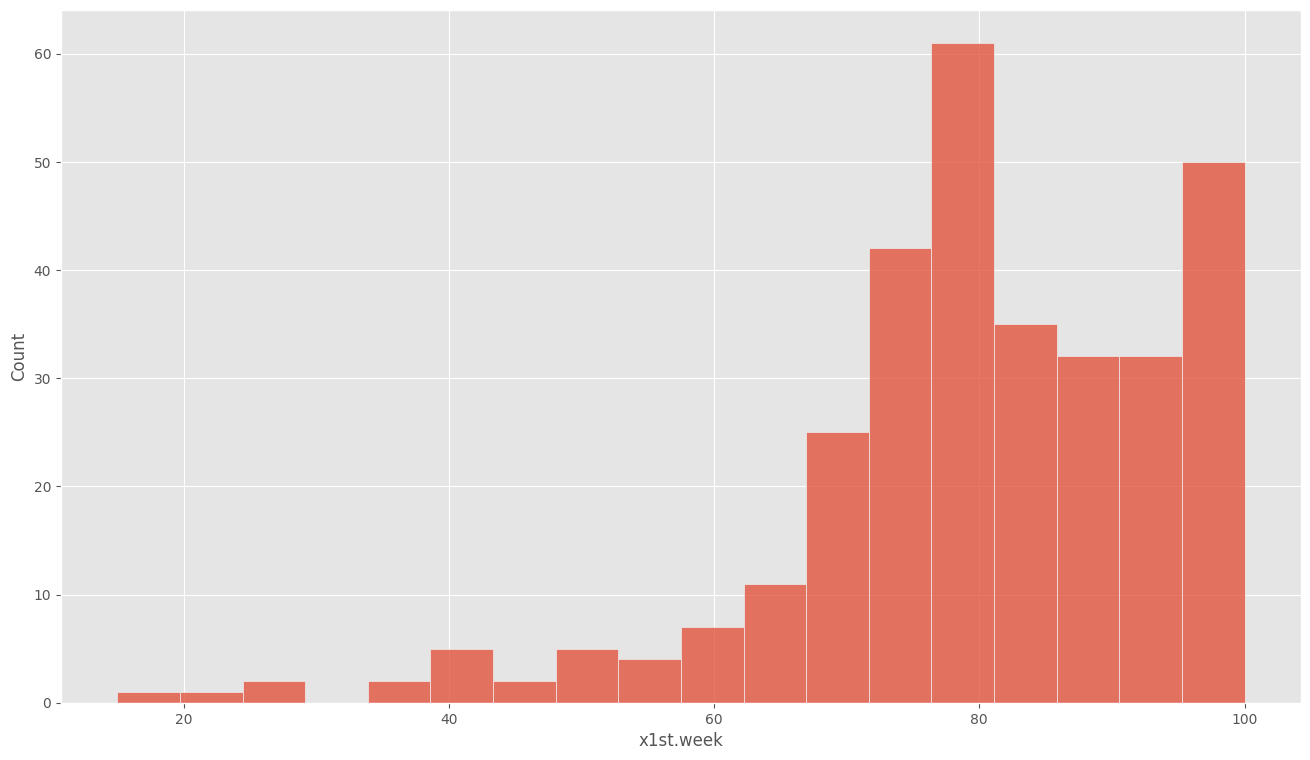

In [ ]:
#sb.factorplot('genre',data=temporal,kind="count")
#sb.displot(temporal['x1st.week'])
sb.histplot(temporal['x1st.week'])

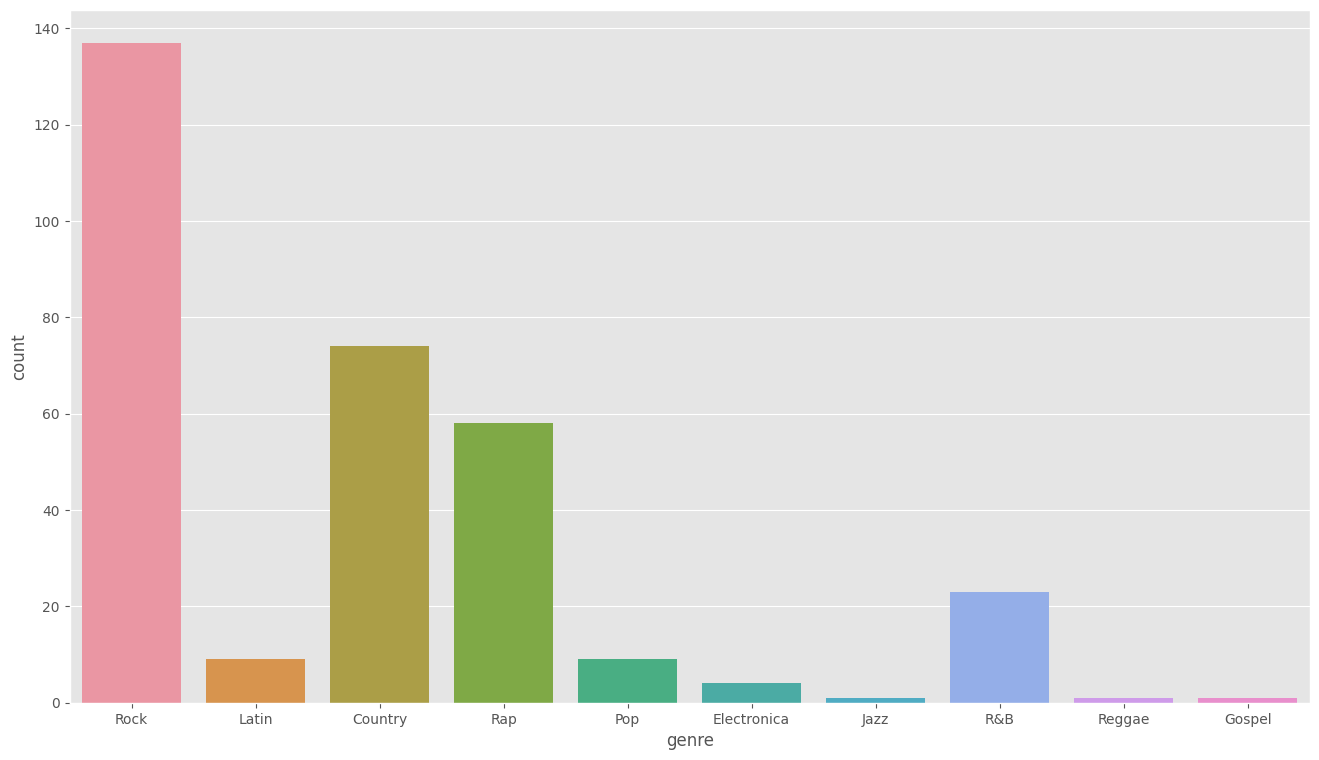

In [ ]:
sb.countplot(x='genre',data=temporal);

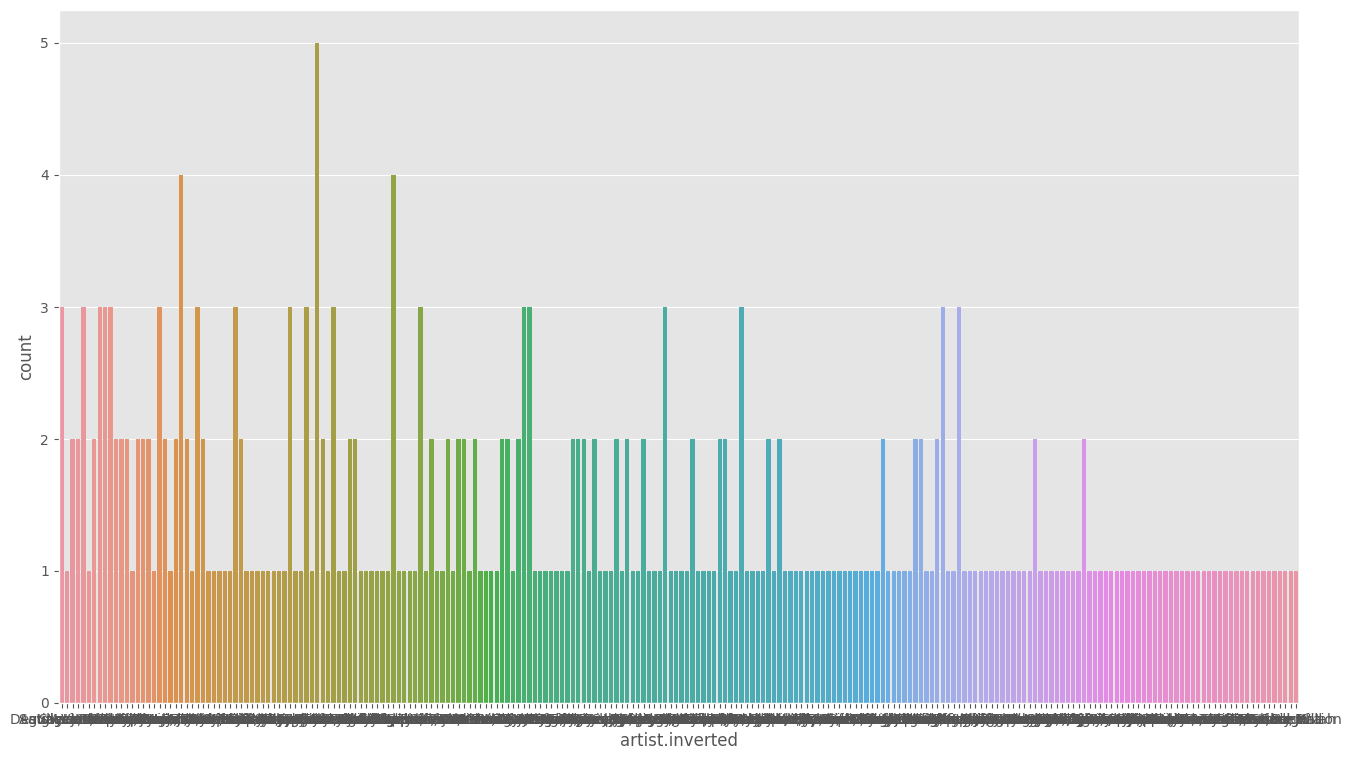

In [ ]:
sb.countplot(x='artist.inverted',data=temporal);